In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
def fit(X, y, wt, iter):
    w_pocket = wt #initilizing w (w_0), with the given parameter
    min_mistake = X.shape[0] #initilizing min_mistake with the maximum mistakes possible (all data points)
    
    for i in range(iter):
        M = np.dot(X, wt) #get the dot product of feature vector with the weight vector
        M = np.multiply(M, y) #as y vector contains -1(when false), the mistakes will be less than 0 (negative)
        mistake_count = (M<0).sum() #getting the count of the elements that are negatives

        if mistake_count < min_mistake: #Heart of Pocket Algorithm
            w_pocket = wt #if the current mistake made by the current w is less than the min_mistake, min_mistake is updated
            min_mistake = mistake_count
        
        
        if(mistake_count > 0):
            mis_pos_array = np.where(M < 0)[0] #obtaining the positions where the mistake occured
            random_mistake_pos = np.random.choice(mis_pos_array) #obtaining the position of a random mistake
            wt = wt + np.multiply(y[random_mistake_pos], X[random_mistake_pos]) #Updating the weight vector        
        else: break #if else is True then data is linearly seperable
            
     #returning an ideal w(might not be the best, as finding best is NP Hard) with its mistake count
    return [w_pocket, min_mistake]

In [41]:
def main():
    breast_cancer = datasets.load_breast_cancer() #loading the breast cancer dataset
    X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=13)
    y_train[y_train == 0] = -1 #changing y's element to -1 when the elements are 0
    y_test[y_test == 0] = -1 #changing y's element to -1 when the elements are 0
    
    iteration_array = [2,5,10,20, 40, 80, 160, 320, 640, 1280, 10000] #number of iterations to be performed
    
    #to store the mistakes count(returned by 'fit' method) for each iterations(when initialization using the first data point)
    mistake_array = np.zeros(len(iteration_array)) 
    
    #to store the mistakes count(returned by 'fit' method) for each iterations(when initialization using linear regression)
    mistake_array_lin = np.zeros(len(iteration_array))
    
    wt = 0 #initializing the weight vector
    
    #initialization using the first data point
    for i in range(len(iteration_array)):
        wt = X_train[0]  #initialization using the first data point
        wt_min_mistake = fit(X_train, y_train, wt, iteration_array[i]) 
        mistake_array[i] = wt_min_mistake[1] #storing the mistake count in the array
        wt = wt_min_mistake[0] #storing the weight vector
    
    #creating performance plot of E_in
    plt.plot(iteration_array, mistake_array, label = "Initialization with First Data Point")  
    
    #Testing the ideal weight vector with the test data
    M = np.dot(X_test, wt) #get the dot product of feature vector with the weight vector
    M = np.multiply(M, y_test)#as y vector contains -1(when false), the mistakes will be less than 0 (negative)
    mistake_count = (M<0).sum() #getting the count of the elements that are negatives
    
    print("E_in is", mistake_array[len(mistake_array)-1]/X_train.shape[0]) #obtaining E_in(average)
    print("E_out is is", mistake_count/X_test.shape[0]) #obtaining E_out(average)
    
#     #####################################

    X_pseudo = np.linalg.pinv(X_train) #obtaining the pseduo inverse of X_train by using the appropriate numpy package
    
    w_lin = 0 #initializing the weight vector
    
    for i in range(len(iteration_array)):
        w_lin = np.dot(X_pseudo, y_train) #obtaining the closed form solution (linear regression algorithm)
        wt_min_mistake = fit(X_train, y_train, w_lin, iteration_array[i])
        mistake_array_lin[i] = wt_min_mistake[1] #storing the mistake count in the array
        w_lin = wt_min_mistake[0] #storing the weight vector
    
    plt.plot(iteration_array, mistake_array_lin, label = "Initialization with Linear Regression")
    
    plt.legend()
    plt.xlabel('Iterations', fontsize=14)
    plt.ylabel('Mistakes', fontsize=14)
    plt.show()
    
    M = np.dot(X_test, w_lin)
   
    M = np.multiply(M, y_test)
    mistake_count = (M<0).sum()

    print("E_in is", mistake_array_lin[len(mistake_array)-1]/X_train.shape[0]) #obtaining E_in(average)
    print("E_out is is", mistake_count/X_test.shape[0]) #obtaining E_out(average)

E_in is 0.06153846153846154
E_out is is 0.10526315789473684


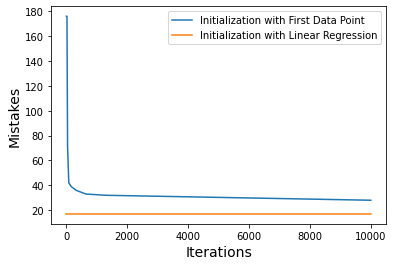

E_in is 0.03736263736263736
E_out is is 0.03508771929824561


In [42]:
if __name__ == "__main__": main()